In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

## Loading the dataset

In [3]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df_des=df.description
df_des=df_des.to_frame()

In [5]:
df_des

,description
0,Before planning an awesome wedding for his gra...
1,Jandino Asporaat riffs on the challenges of ra...
2,"With the help of three human allies, the Autob..."
3,When a prison ship crash unleashes hundreds of...
4,When nerdy high schooler Dani finally attracts...
...,...
6229,"This parody of first-person shooter games, mil..."
6230,"Marc Maron stars as Marc Maron, who interviews..."
6231,Nursery rhymes and original music for children...
6232,"Set during the Russian Revolution, this comic ..."


In [6]:
df_des=[description.strip() for description in df_des.description] # remove both the leading and the trailing characters
df_des

['Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.',
 'Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "Sex on Fire" in his comedy show.',
 'With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron.',
 'When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind.',
 'When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity.',
 'A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral.',
 'In a dystopian future, an insurance adjuster for a tech company investigates a robot killed for violating protocol and discovers a gl

In [7]:
# df_des=[description.strip() for description in df_des.description] # remove both the leading and the trailing characters
df_des = [description for description in df_des if description] #  unnecessary space are removes by the help of strip ,removes empty strings, because they are considered in Python as False
df_des[0:10]

['Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.',
 'Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "Sex on Fire" in his comedy show.',
 'With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron.',
 'When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind.',
 'When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity.',
 'A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral.',
 'In a dystopian future, an insurance adjuster for a tech company investigates a robot killed for violating protocol and discovers a gl

In [8]:
# Joining the list into one string/text
text = ' '.join(df_des)
text

'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first. Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "Sex on Fire" in his comedy show. With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron. When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind. When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity. A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral. In a dystopian future, an insurance adjuster for a tech company investigates a robot killed for violating protocol and discovers a global conspiracy. Fabrizio

In [9]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

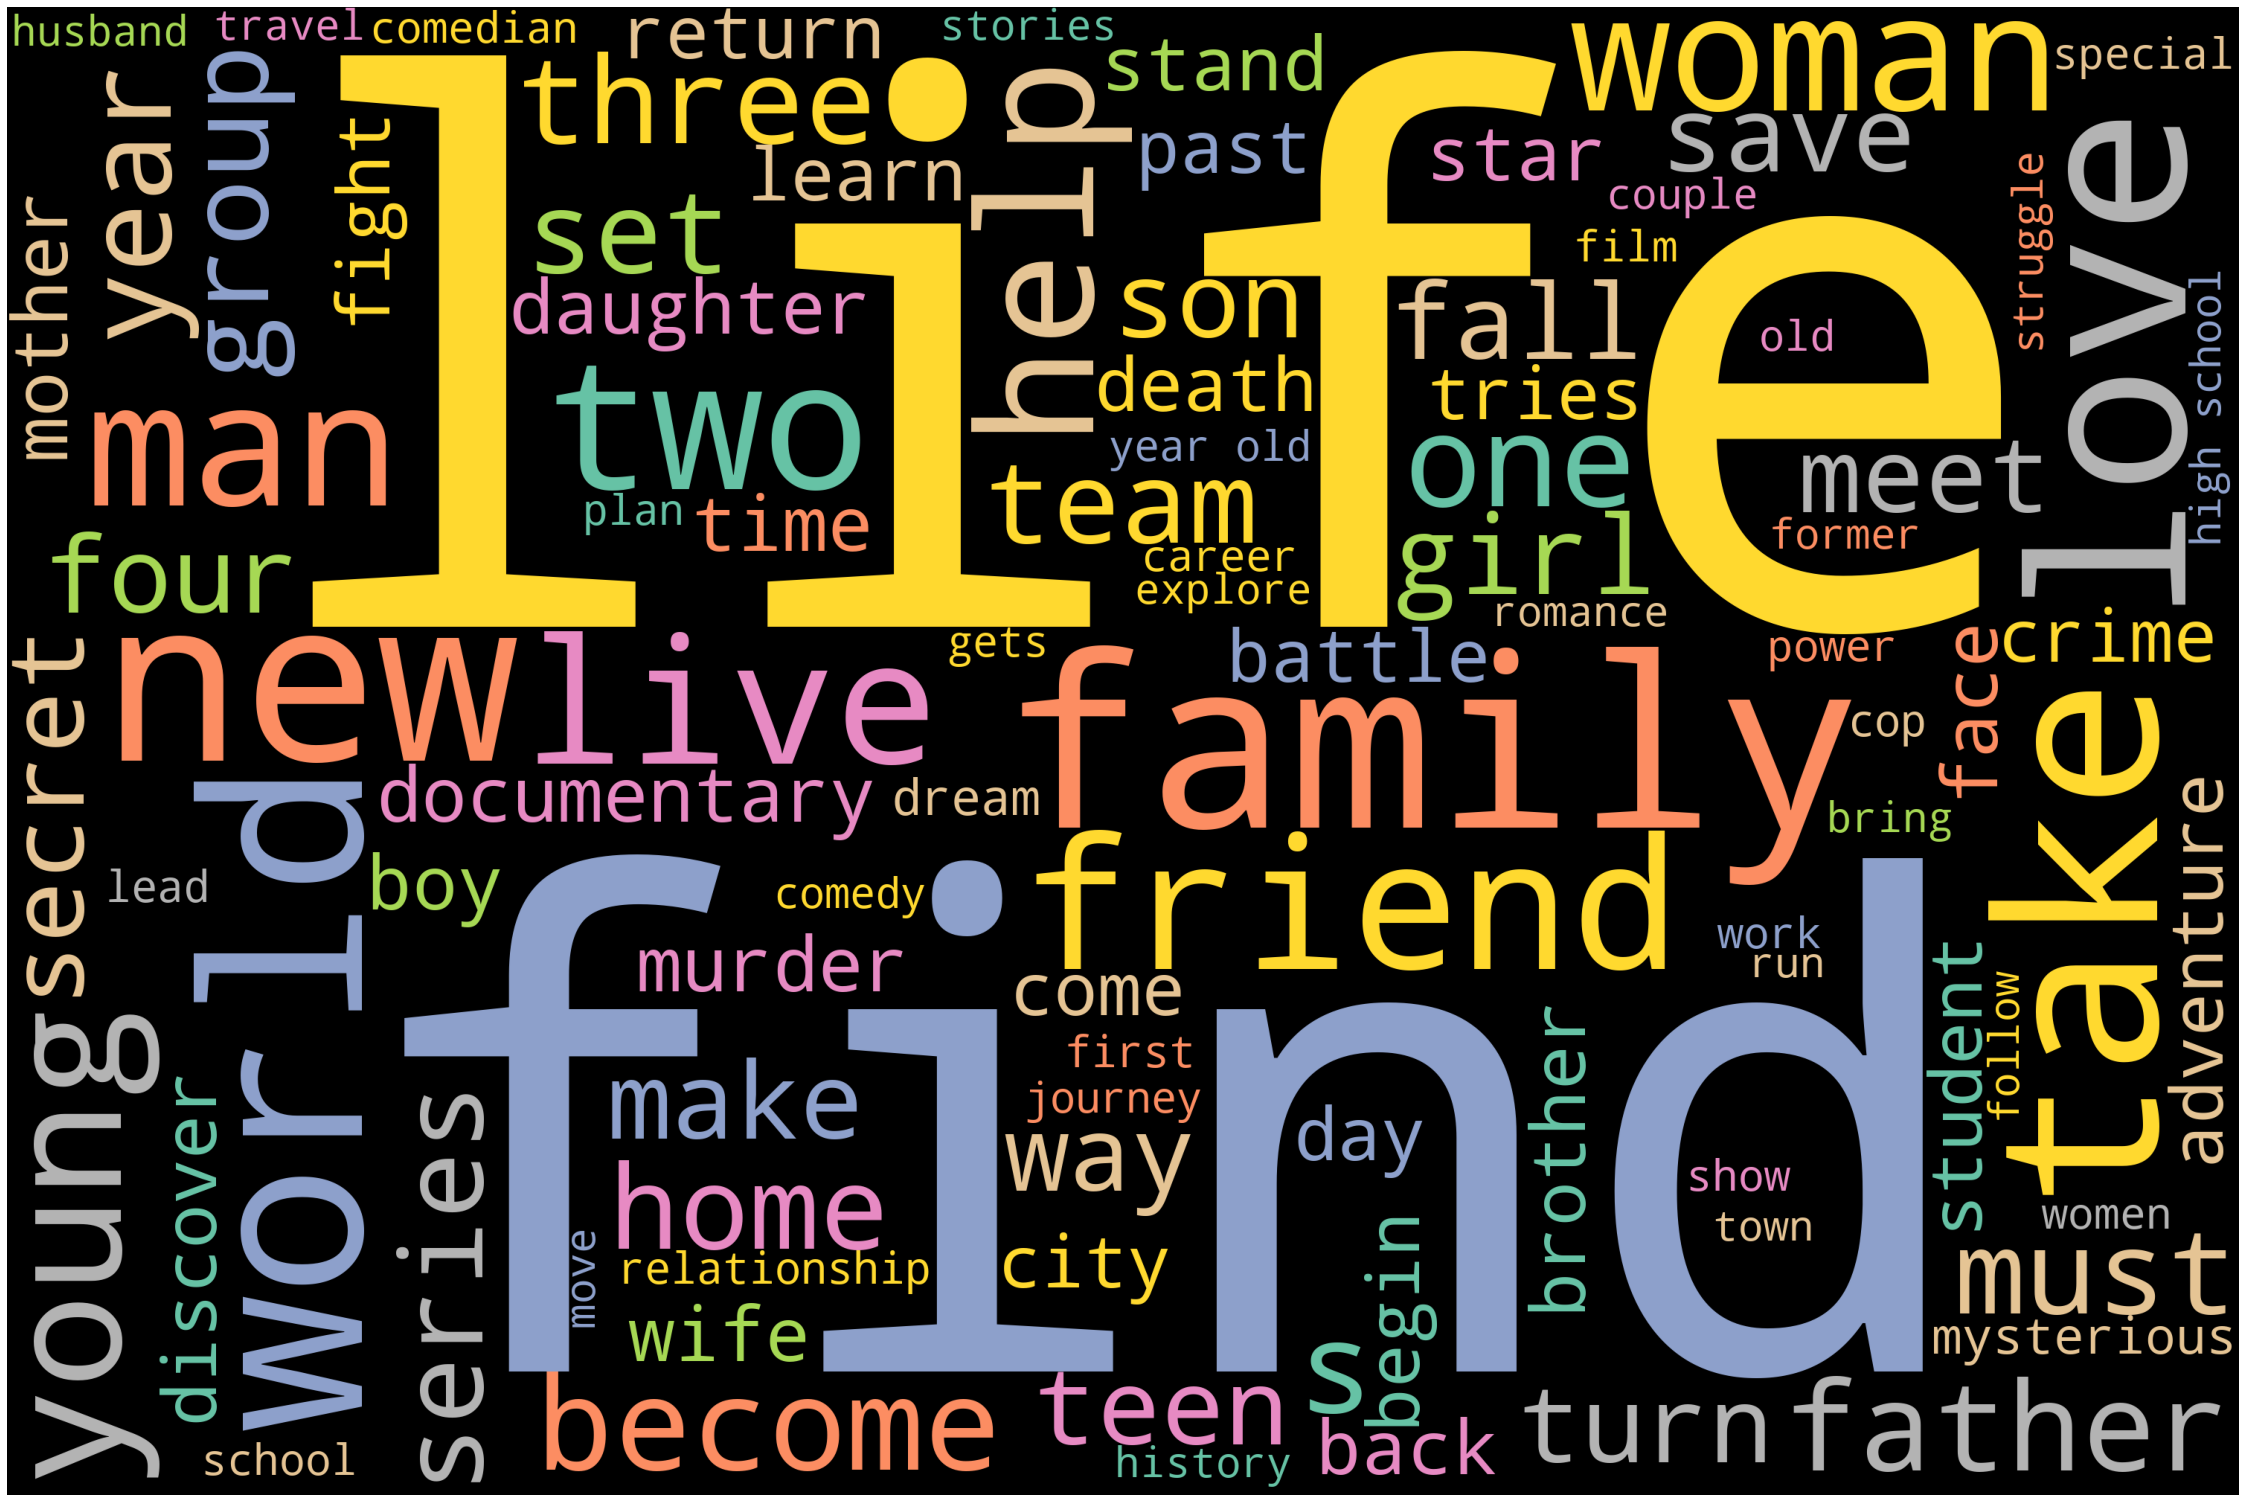

In [10]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [11]:
wordcloud.to_file("netflix_word_freq.png")

In [12]:
df_year=df.groupby(["release_year","type"]).size().reset_index(name="total_content")

In [13]:
df_year[df_year["release_year"]>=2010]

,release_year,type,total_content
93,2010,Movie,111
94,2010,TV Show,38
95,2011,Movie,100
96,2011,TV Show,36
97,2012,Movie,125
98,2012,TV Show,58
99,2013,Movie,177
100,2013,TV Show,60
101,2014,Movie,213
102,2014,TV Show,75


## Visualizing the type of show after 2012 year

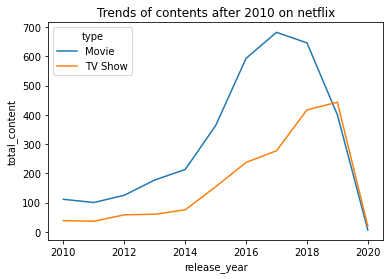

In [14]:
sns.lineplot(x="release_year",y="total_content",data=df_year[df_year["release_year"]>=2010],hue="type")
plt.title("Trends of contents after 2010 on netflix")
plt.savefig("Trends_of_CONTENTS.jpg")
plt.show()

# plt.plot(sd["release_year"],sd["Table_content"],color="red")
# plt.plot(sd1["release_year"],sd1["Table_content"],color="yellow")

### Top 8 director  of the TV show and Movie

In [15]:
df1=df["director"].value_counts().to_frame().reset_index()
df1.columns=["director","count"]
df1=df1.head(8)
df1

,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,13
3,Jay Chapman,12
4,Steven Spielberg,9
5,Martin Scorsese,9
6,Lance Bangs,8
7,David Dhawan,8


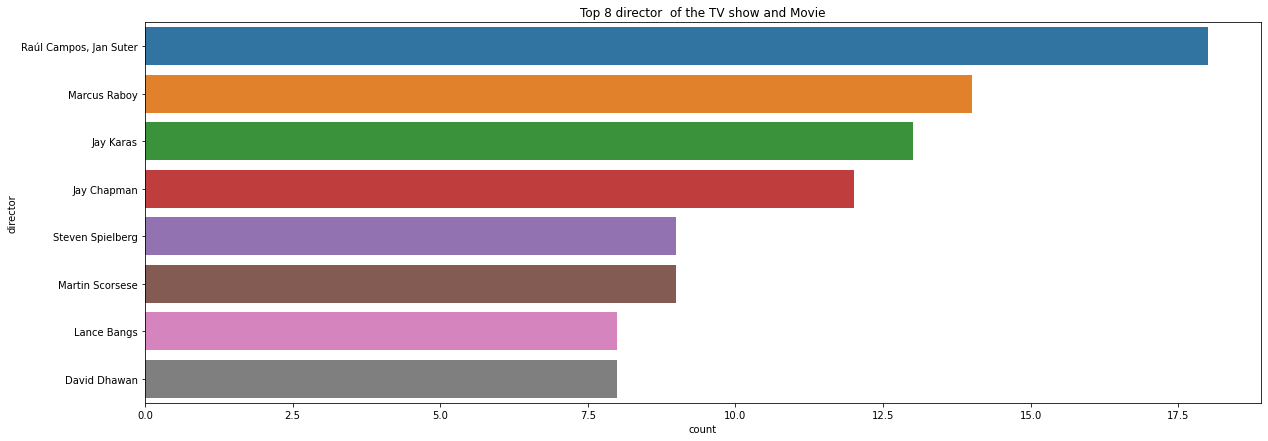

In [16]:
plt.figure(figsize=(20,7))
plt.title("Top 8 director  of the TV show and Movie")
sns.barplot(df1["count"],df1["director"])
plt.savefig("top_8_director.jpg")
plt.show()

In [17]:
df[df["director"]=="Raúl Campos, Jan Suter"]#ALL ARE TV-MA (MATURE AUDIENCE ONLY) SO MAXIMUM ARE INTERESTED TO VIEW THE MATURED MOVIES

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1337,80183088,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
1655,80192137,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
1794,80192065,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
2035,80183197,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
2133,80192139,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
2134,80192063,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
2504,80191989,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
2550,80097641,Movie,Sofía Niño de Rivera: Exposed,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"June 24, 2016",2016,TV-MA,80 min,Stand-Up Comedy,Self-deprecating comic Sofía Niño de Rivera pu...
2783,80192064,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
2834,80192135,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


<AxesSubplot:ylabel='rating'>

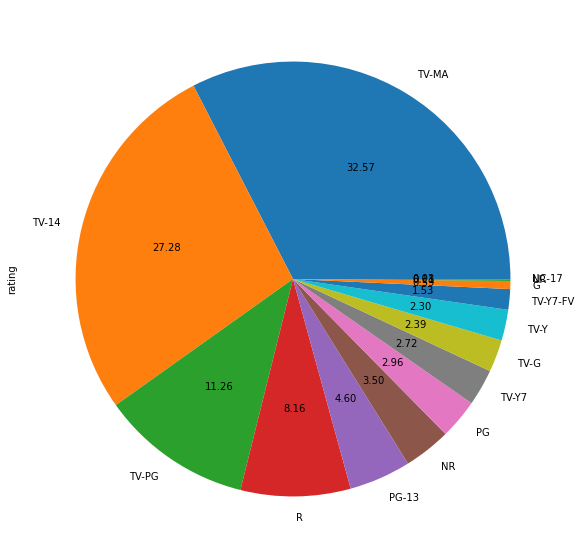

In [18]:
plt.figure(figsize=(11,10))
df["rating"].value_counts().plot(kind="pie",autopct="%0.2f")

In [19]:
df[(df["rating"]=='TV-MA') | (df["rating"]=='R')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6210,80239700,TV Show,Psiconautas,NaN,"Guillermo Toledo, Gabriel Goity, Florencia Peñ...",Argentina,"April 15, 2018",2016,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",A Spanish con man masquerades as a therapist a...
6214,80049872,TV Show,Chelsea,NaN,NaN,United States,"April 14, 2017",2017,TV-MA,2 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies","It's not her first talk show, but it is a firs..."
6222,70136122,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,"April 1, 2014",2012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."


In [20]:
df["rating"].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [21]:
df["type"].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## Cleaning the data

### Checking the duplicate data present or not

In [23]:
df[df.duplicated()]#No any duplicate data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [24]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [25]:
df.shape

(6234, 12)

In [26]:
df["title"].nunique()

6172

In [27]:
df["show_id"].nunique()

6234

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [29]:
df["title"].value_counts()

The Silence                     3
Limitless                       3
Love                            3
Tunnel                          3
Oh My Ghost                     3
                               ..
Day and Night                   1
Oversize Cops                   1
I Don't Know How She Does It    1
Drugs, Inc.                     1
Friends                         1
Name: title, Length: 6172, dtype: int64

### Visualizing the null values present in the data

<AxesSubplot:>

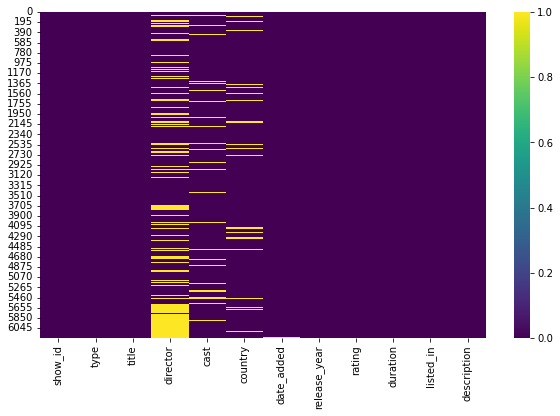

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap="viridis")

### Counting how many null values present in each columns

In [31]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [32]:
df.shape

(6234, 12)

### Finding the most frequency occur of the "director", "cast" , "country","rating" which contain the missing values

###  *DIRECTOR*

In [33]:
df["director"].mode()#Raúl Campos, Jan Suter director mostly present

0    Raúl Campos, Jan Suter
Name: director, dtype: object

In [34]:
(df[df["director"]=="Raúl Campos, Jan Suter"])#here we see that this director make only movies and the only rating by TV-MA
                                            #Also this director make macimum movie on country mexico

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1337,80183088,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
1655,80192137,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
1794,80192065,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
2035,80183197,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
2133,80192139,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
2134,80192063,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
2504,80191989,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
2550,80097641,Movie,Sofía Niño de Rivera: Exposed,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"June 24, 2016",2016,TV-MA,80 min,Stand-Up Comedy,Self-deprecating comic Sofía Niño de Rivera pu...
2783,80192064,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
2834,80192135,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


###  *Cast*

In [35]:
df["cast"].mode()#David Attenborough cast mostly occur

0    David Attenborough
Name: cast, dtype: object

In [36]:
df[df["cast"]=="David Attenborough"]#Here we see that this cast is only a type of TV SHOW, and maximum have 1 season duration
                                    # it belongs to country united kingdom, & most director are not present

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
774,70245168,TV Show,Nature's Great Events (2009),NaN,David Attenborough,"United States, United Kingdom","October 10, 2015",2009,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This series looks at how seasonal changes caus...
775,70235731,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...
1778,80097726,TV Show,The Hunt,NaN,David Attenborough,United Kingdom,"May 14, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Witness some of the most riveting showdowns in...
2413,80172468,Movie,Nature: Raising the Dinosaur Giant,NaN,David Attenborough,United States,"March 1, 2017",2016,TV-G,53 min,Documentaries,Sir David Attenborough examines a recently dis...
2594,80005588,TV Show,Life Story,NaN,David Attenborough,United Kingdom,"June 20, 2016",2014,TV-14,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This documentary series follows wild creatures...
3272,70261978,TV Show,Frozen Planet,Alastair Fothergill,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...
3273,70279637,Movie,Frozen Planet: On Thin Ice,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,47 min,Movies,David Attenborough journeys to both polar regi...
3274,80049171,Movie,Frozen Planet: The Epic Journey,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,52 min,Movies,Collecting highlights from the epic documentar...
3275,80048250,TV Show,The Making of Frozen Planet,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2012,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Documentary crew members brave Earth's most fr...
4300,80990571,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,"December 3, 2018",2017,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


### *Country*

In [37]:
df["country"].mode()#Most movies are from United states

0    United States
Name: country, dtype: object

### *date_added*

In [38]:
df["date_added"].mode()#January 1, 2020 most occuring date where movie and TV show viewd

0    January 1, 2020
Name: date_added, dtype: object

In [39]:
january_df=df[df["date_added"]=="January 1, 2020"]
january_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3480,70084788,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
3481,60036237,Movie,A Cinderella Story,Mark Rosman,"Hilary Duff, Chad Michael Murray, Jennifer Coo...","United States, Canada","January 1, 2020",2004,PG,95 min,"Children & Family Movies, Comedies",Teen Sam meets the boy of her dreams at a danc...
3482,80014637,Movie,Alpha and Omega: The Legend of the Saw Tooth Cave,Richard Rich,"Debi Derryberry, Ben Diskin, Kate Higgins, Lin...","United States, India","January 1, 2020",2014,TV-Y7,45 min,Children & Family Movies,When a wolf pup named Runt sneaks off to explo...
3483,60000407,Movie,American Beauty,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...",United States,"January 1, 2020",1999,R,122 min,Dramas,While struggling to endure his tightly wound w...
3484,70202138,Movie,Arthur Christmas,Sarah Smith,"James McAvoy, Hugh Laurie, Bill Nighy, Jim Bro...","United Kingdom, United States","January 1, 2020",2011,PG,98 min,"Children & Family Movies, Comedies",At Santa Claus's super-secret toy-making facil...


In [40]:
january_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [41]:
january_df.groupby("date_added")["type"].value_counts()#Total 122 type of show seen in this day

date_added       type   
January 1, 2020  Movie      111
                 TV Show     11
Name: type, dtype: int64

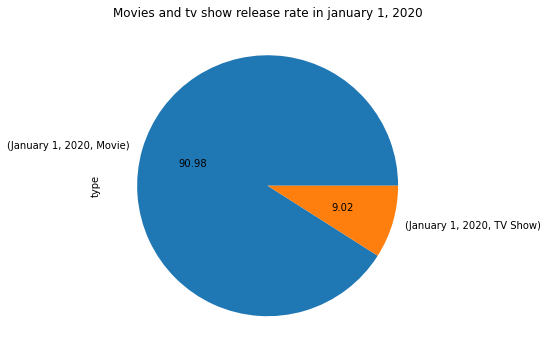

In [42]:
plt.figure(figsize=(8,6))
january_df.groupby("date_added")["type"].value_counts().plot(kind="pie",autopct="%0.2f")
plt.title("Movies and tv show release rate in january 1, 2020")
plt.savefig("jan1_release_movie_tv_show.jpg")
plt.show()

## *Rating*

In [43]:
df["rating"].mode()#TV-MA is more frequenced rating

0    TV-MA
Name: rating, dtype: object

In [44]:
len(df[df["rating"]=="TV-MA"])

2027

### Converting into a proper date-time format and adding two more features year and month,
*if anyone wants to know which month or year movie or TV Show viewd then it will easy to interprete*

In [45]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [46]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0


### Here I have added one column which is counting season. ("duration" - Movies) & ("counting season" - TV SHOW)

In [47]:
df["counting_season"]=df.apply(lambda x : x["duration"].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df["duration"]=df.apply(lambda x : x["duration"].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [48]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,counting_season
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0,9.0,1
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017.0,9.0,
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017.0,9.0,
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0,9.0,1
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017.0,9.0,


In [49]:
dis=dict(df["country"].value_counts())

### Neglecting show_id, title, cast, description, director

In [50]:
df1=df.drop(["show_id","title","director","cast","description"],axis=1)

In [51]:
df1.head(4)

,type,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,counting_season
0,Movie,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",2019.0,9.0,
1,Movie,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,2016.0,9.0,
2,TV Show,United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,2018.0,9.0,1
3,TV Show,United States,2018-09-08,2016,TV-Y7,,Kids' TV,2018.0,9.0,1


### Finding the types, which is more 

In [52]:
df["type"].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

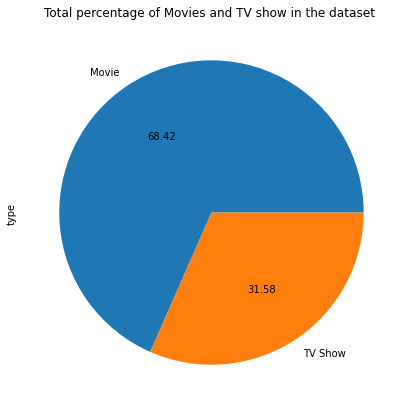

In [53]:
plt.figure(figsize=(8,7))
df["type"].value_counts().plot(kind="pie",autopct="%0.2f")
plt.title("Total percentage of Movies and TV show in the dataset ")
plt.savefig("Total_percentage_of_Movies_and_TV_show.jpg")
plt.show()

### Viewing how many times rating occurs in the types("Movie",	"TV Show") 
*finding what audience prefer to watch*

In [54]:
df["rating"].value_counts()#TV-MA has a highest rating

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [55]:
ratings_count=pd.DataFrame(df["rating"].value_counts().reset_index())

In [56]:
rating=list(ratings_count["rating"])

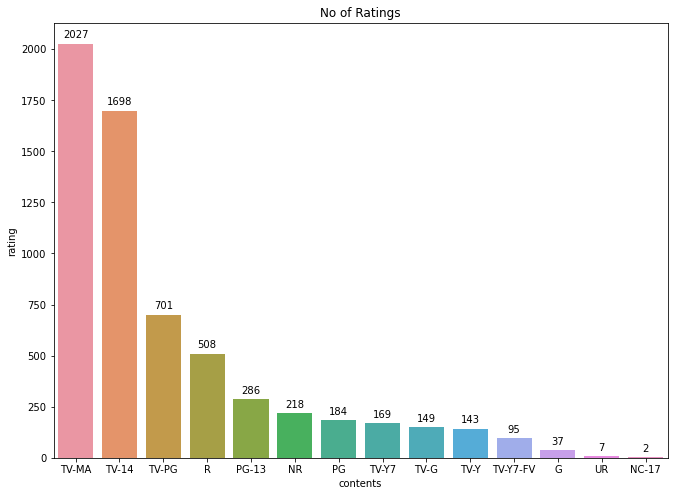

In [57]:
plt.figure(figsize=(11,8))
sns.barplot(ratings_count["index"],ratings_count["rating"])
for index, data in enumerate(rating):
    plt.text(x=index,y=data+29,s=f"{data}",ha="center")
plt.xlabel("contents")
plt.ylabel("rating")
plt.title("No of Ratings")
plt.savefig("No_of_rating.jpg")
plt.show()

### Now viewing rating according to the types 

In [58]:
ss=df.groupby("rating")["type"].value_counts()

In [59]:
ss

rating    type   
G         Movie        36
          TV Show       1
NC-17     Movie         2
NR        Movie       202
          TV Show      16
PG        Movie       183
          TV Show       1
PG-13     Movie       286
R         Movie       506
          TV Show       2
TV-14     Movie      1038
          TV Show     660
TV-G      Movie        80
          TV Show      69
TV-MA     Movie      1348
          TV Show     679
TV-PG     Movie       432
          TV Show     269
TV-Y      TV Show     102
          Movie        41
TV-Y7     TV Show     100
          Movie        69
TV-Y7-FV  TV Show      68
          Movie        27
UR        Movie         7
Name: type, dtype: int64

In [60]:
ss1=dict(pd.crosstab(df["rating"],df["type"]))

In [61]:
df_type_rate=pd.DataFrame(ss1).reset_index()
df_type_rate

,rating,Movie,TV Show
0,G,36,1
1,NC-17,2,0
2,NR,202,16
3,PG,183,1
4,PG-13,286,0
5,R,506,2
6,TV-14,1038,660
7,TV-G,80,69
8,TV-MA,1348,679
9,TV-PG,432,269


### Combine bar plot of the of TV SHOW and MOVIE

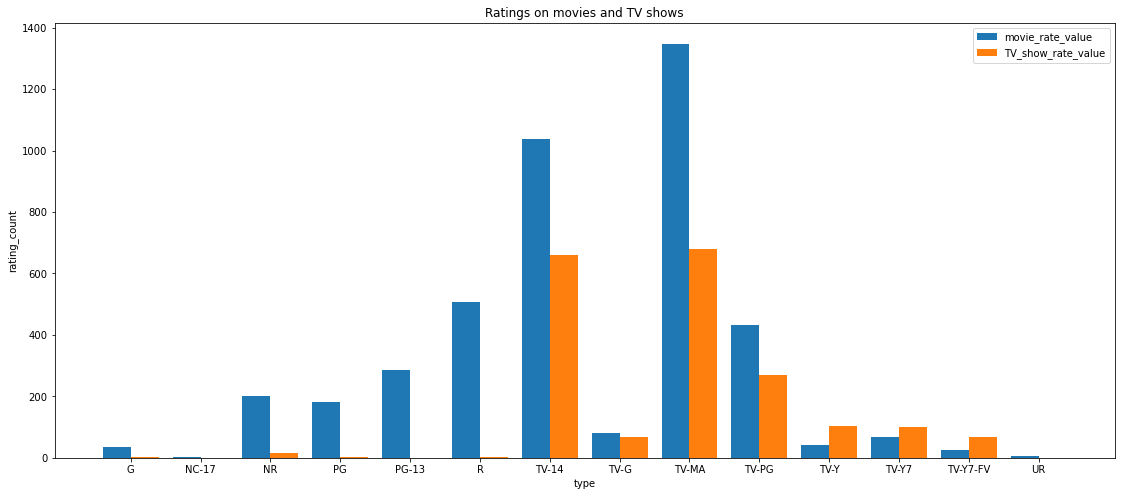

In [62]:
w=0.4
plt.figure(figsize=(19,8))

bar1=np.arange(len(df_type_rate["rating"]))
# plt.ylim([0.70,1.02])

bar2=[i+w for i in bar1]
plt.bar(bar1,df_type_rate["Movie"],0.4,label="movie_rate_value")
plt.bar(bar2,df_type_rate["TV Show"],0.4,label="TV_show_rate_value")
plt.xlabel("type")
plt.ylabel("rating_count")
plt.xticks(bar1+w/2,df_type_rate['rating'])
plt.legend()
plt.title("Ratings on movies and TV shows")
plt.savefig("Rating_on_movie_and_tv.jpg")
plt.show()

### If a producer wants to release a show which month is the best month to release it

In [63]:
df1.head()

,type,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,counting_season
0,Movie,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",2019.0,9.0,
1,Movie,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,2016.0,9.0,
2,TV Show,United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,2018.0,9.0,1
3,TV Show,United States,2018-09-08,2016,TV-Y7,,Kids' TV,2018.0,9.0,1
4,Movie,United States,2017-09-08,2017,TV-14,99,Comedies,2017.0,9.0,


In [64]:
df_month=pd.DataFrame(df1["month_added"].value_counts()).reset_index()
# df_month["index"].sort_values()

In [65]:
df_month

,index,month_added
0,12.0,696
1,10.0,646
2,11.0,612
3,1.0,610
4,3.0,551
5,8.0,509
6,9.0,479
7,7.0,474
8,4.0,447
9,5.0,428


In [66]:
df_month=df_month.sort_values(by="index")

In [67]:
df_month["months"]=df_month["index"].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [88]:
month_added=list(df_month["month_added"])

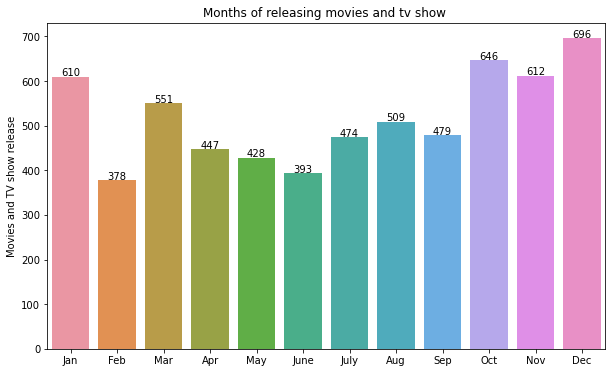

In [94]:
plt.figure(figsize=(10,6))
x=np.arange(len(df_month["months"]))
sns.barplot(x,df_month["month_added"])
for ind, dat in enumerate(month_added):
    plt.text(x=ind,y=dat+2,s=f"{dat}",ha="center")
plt.xticks(x,df_month["months"])
plt.ylabel("Movies and TV show release")
plt.title("Months of releasing movies and tv show ")
plt.savefig("Months_of_releasing_movies_and_tv_show.jpg")
plt.show()

### Now viewing month wise how many movies and TV show release

In [70]:
ss2=df1.groupby("month_added")["type"].value_counts()

In [71]:
ss2

month_added  type   
1.0          Movie      458
             TV Show    152
2.0          Movie      263
             TV Show    115
3.0          Movie      391
             TV Show    160
4.0          Movie      308
             TV Show    139
5.0          Movie      295
             TV Show    133
6.0          Movie      260
             TV Show    133
7.0          Movie      313
             TV Show    161
8.0          Movie      334
             TV Show    175
9.0          Movie      307
             TV Show    172
10.0         Movie      441
             TV Show    205
11.0         Movie      421
             TV Show    191
12.0         Movie      473
             TV Show    223
Name: type, dtype: int64

In [72]:
cross_df=dict(pd.crosstab(df1["month_added"],df["type"]))

In [73]:
df_movie_tvshow_rel=pd.DataFrame(cross_df).reset_index()
df_movie_tvshow_rel

,month_added,Movie,TV Show
0,1.0,458,152
1,2.0,263,115
2,3.0,391,160
3,4.0,308,139
4,5.0,295,133
5,6.0,260,133
6,7.0,313,161
7,8.0,334,175
8,9.0,307,172
9,10.0,441,205


In [74]:
df_movie_tvshow_rel["months_name"]=df_movie_tvshow_rel["month_added"].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [75]:
df_movie_tvshow_rel

,month_added,Movie,TV Show,months_name
0,1.0,458,152,Jan
1,2.0,263,115,Feb
2,3.0,391,160,Mar
3,4.0,308,139,Apr
4,5.0,295,133,May
5,6.0,260,133,June
6,7.0,313,161,July
7,8.0,334,175,Aug
8,9.0,307,172,Sep
9,10.0,441,205,Oct


In [76]:
df_movie_tvshow_rel["divide_movie_tv_show"]=df_movie_tvshow_rel["TV Show"]/df_movie_tvshow_rel["Movie"]
df_movie_tvshow_rel

,month_added,Movie,TV Show,months_name,divide_movie_tv_show
0,1.0,458,152,Jan,0.331878
1,2.0,263,115,Feb,0.437262
2,3.0,391,160,Mar,0.409207
3,4.0,308,139,Apr,0.451299
4,5.0,295,133,May,0.450847
5,6.0,260,133,June,0.511538
6,7.0,313,161,July,0.514377
7,8.0,334,175,Aug,0.523952
8,9.0,307,172,Sep,0.560261
9,10.0,441,205,Oct,0.464853


In [77]:
df_movie_tvshow_rel[["Movie","TV Show"]].corr()

,Movie,TV Show
Movie,1.000000,0.772491
TV Show,0.772491,1.000000


In [78]:
# scatter plot

In [79]:
# sns.heatmap(df_movie_tvshow_rel[["Movie","TV Show"]].corr(),cmap="viridis",annot=True)

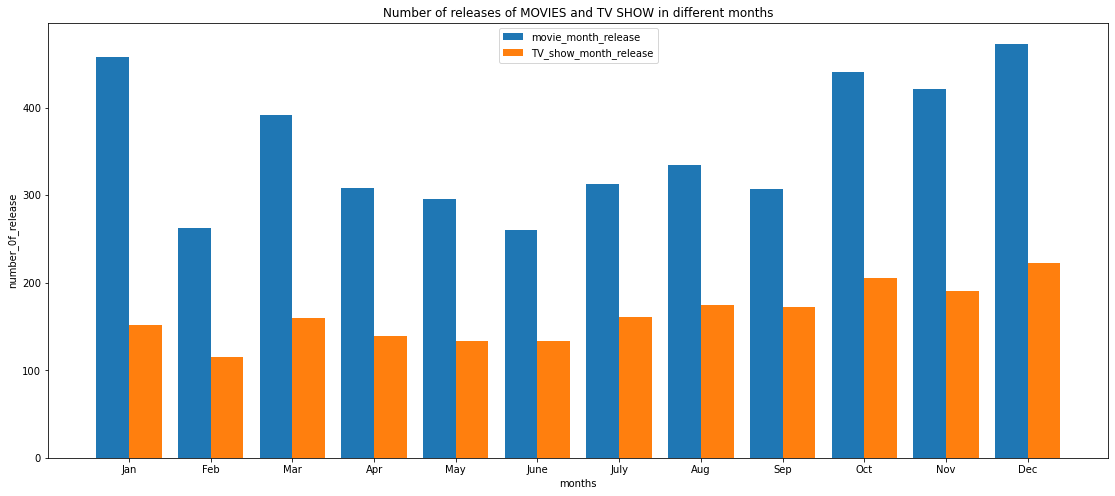

In [80]:
w=0.4
plt.figure(figsize=(19,8))

bar3=np.arange(len(df_movie_tvshow_rel["months_name"]))
# plt.ylim([0.70,1.02])

bar4=[i+w for i in bar3]
plt.bar(bar3,df_movie_tvshow_rel["Movie"],0.4,label="movie_month_release")
plt.bar(bar4,df_movie_tvshow_rel["TV Show"],0.4,label="TV_show_month_release")
plt.xlabel("months")
plt.ylabel("number_0f_release")
plt.xticks(bar3+w/2,df_movie_tvshow_rel["months_name"])
plt.legend()
plt.title("Number of releases of MOVIES and TV SHOW in different months")
plt.show()

### What is the .... over the years by comparing both

In [81]:
year_compare_type=pd.DataFrame(pd.crosstab(df1["year_added"],df["type"])).reset_index()
year_compare_type

type,year_added,Movie,TV Show
0,2008.0,1,1
1,2009.0,2,0
2,2010.0,1,0
3,2011.0,13,0
4,2012.0,4,3
5,2013.0,6,6
6,2014.0,19,6
7,2015.0,58,32
8,2016.0,264,192
9,2017.0,913,387


### Checking any relation between both the type according to years

In [82]:
year_compare_type[["Movie","TV Show"]].corr()

type,Movie,TV Show
type,,
Movie,1.000000,0.983339
TV Show,0.983339,1.000000


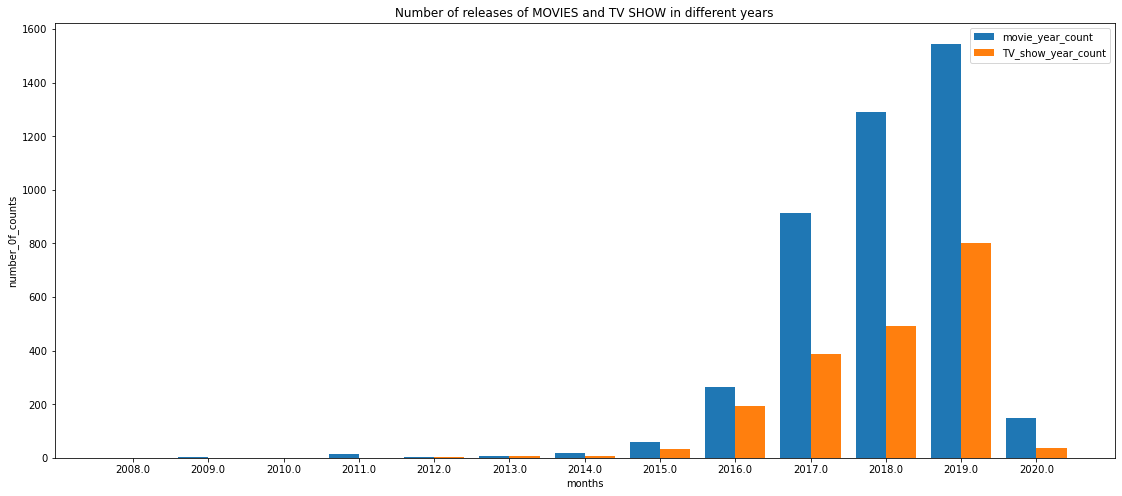

In [87]:
w=0.4
plt.figure(figsize=(19,8))

bar5=np.arange(len(year_compare_type["year_added"]))
# plt.ylim([0.70,1.02])

bar6=[i+w for i in bar5]
plt.bar(bar5,year_compare_type["Movie"],0.4,label="movie_year_count")
plt.bar(bar6,year_compare_type["TV Show"],0.4,label="TV_show_year_count")
plt.xlabel("months")
plt.ylabel("number_0f_counts")
plt.xticks(bar5+w/2,year_compare_type["year_added"])
plt.legend()
plt.title("Number of releases of MOVIES and TV SHOW in different years")
plt.savefig("Number_of_releases_of_OVIES_and_TV_HOW_in_different_years.jpg")

plt.show()

## Counting per year publish of movies and TV show

In [84]:
df["year_added"].value_counts()

2019.0    2349
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

<AxesSubplot:xlabel='year_added', ylabel='count'>

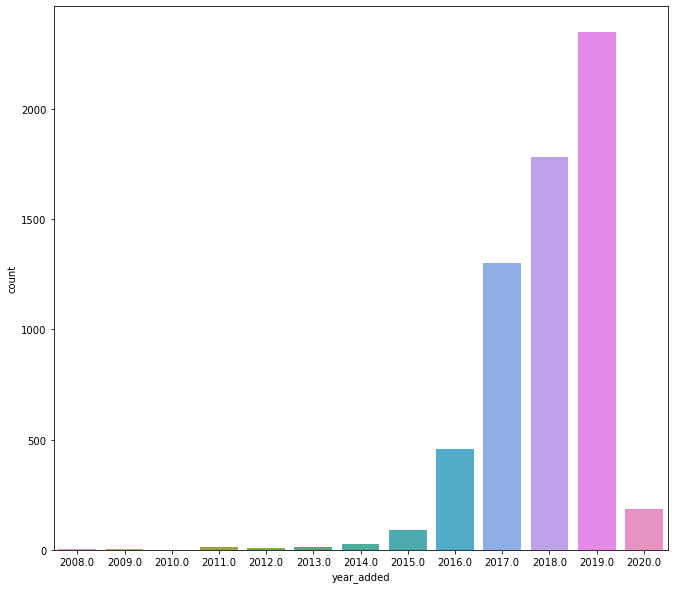

In [85]:
plt.figure(figsize=(11,10))
sns.countplot(df1["year_added"])